readme：
使用 SVM 对手写数字进行识别。使用了主成分分析（PCA）、网格搜索、构建显示主要分类指标的文本报告、混淆矩阵等。

load digits data....
data shape: (1797, 64)
target shape: (1797,)
target_names shape (10,)
------------
split data/target into train and test set...
X_train.shape: (1347, 64) X_test.shape: (450, 64)
------------
visulization digits...


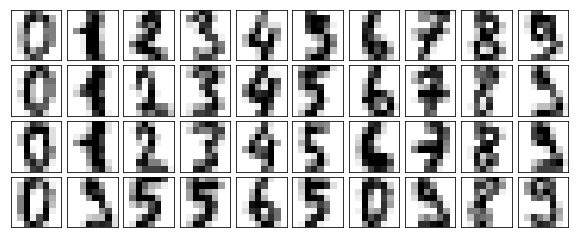

In [7]:
from sklearn.datasets import load_digits # 数据集
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from time import time

print("load digits data....")
digits = load_digits()
data = digits.data
target = digits.target
target_names = digits.target_names
print("data shape:", data.shape)
print("target shape:", target.shape)
print("target_names shape", target_names.shape)
print("------------")

print("split data/target into train and test set...")
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)
print("X_train.shape:", X_train.shape, 'X_test.shape:', X_test.shape)
print("------------")

# 可视化数据
print("visulization digits...")
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))

plot_digits(data)

PCA...


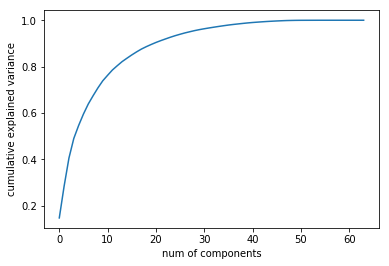

In [2]:
# PCA 分析
print("PCA...")
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("num of components")
plt.ylabel('cumulative explained variance');

只需要 50 个左右的特征就可以尽可能的描述原来的图像

In [3]:
del pca
print("PCA 分析...")
t0 = time()
pca = PCA(n_components=50, svd_solver="randomized", whiten=True).fit(X_train)
print("done is %0.3fs" % (time()-t0))
pca.components_.shape

PCA 分析...
done is 0.034s


(50, 64)

In [4]:
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done is %0.3fs" % (time()-t0))
print("X_train_pca shape", X_train_pca.shape)
print("X_test_pca shape", X_test_pca.shape)

done is 0.003s
X_train_pca shape (1347, 50)
X_test_pca shape (450, 50)


In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV # 网格搜索
print("Grid search use SVM")
t0 = time()
svc = SVC(kernel='rbf', class_weight='balanced')
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
clf = GridSearchCV(svc, param_grid, cv=5)
print("done is %0.3fs" % (time()-t0))
clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Grid search use SVM
done is 0.000s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [6]:
y_predicted = clf.predict(X_test_pca)
# 构建显示主要分类指标的文本报告
print(classification_report(y_true=y_test, y_pred=y_predicted, labels=target_names)) 
# 混淆矩阵
print(confusion_matrix(y_true=y_test, y_pred=y_predicted, labels=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      1.00      0.99        37
           2       0.97      0.97      0.97        38
           3       0.98      0.96      0.97        46
           4       1.00      1.00      1.00        55
           5       0.97      1.00      0.98        59
           6       1.00      0.98      0.99        45
           7       1.00      0.98      0.99        41
           8       0.97      1.00      0.99        38
           9       0.98      0.96      0.97        48

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  1 37  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  1  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0